In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("/content/Final_Data - Final_Data.csv.csv")
print("1st five rows")
print(df.head())

print("Data types and missing values")
print(df.info())

print("Summary statistics for numeric columns")
print(df.describe())

print("Number of unique values in each column:")
print(df.nunique())

print("Check the unique values in each column")
for i in df.columns:
  print(df[i].nunique())

print("Null Values in each column")
print(df.isnull().sum())

print("Duplictae Values in the dataset")
print(df.duplicated().sum())



1st five rows
   Unnamed: 0  Flat no Wing Owner Name Owner's Spouse Name No of Resident  \
0           0      101    A      Omkar                   -              4   
1           1      102    A    Bhavana                   -              5   
2           2      103    A     Govind                   -              5   
3           3      201    A      Reena                   -              4   
4           4      202    A   Karishma                   -              7   

  Confirmed Members Origin of Owner  Flat Area (sq.mt)  No of Room  \
0                 4     Maharashtra                500           2   
1                 6       Bangalore                500           2   
2                 3       Rajasthan                500           2   
3                 2  Madhya Pradesh                550           2   
4                15         Gujurat                600           3   

  Tenant or owner Maintenance Amt Availlability of owner Flat Vacancy  \
0           Owner            

In [ ]:
df.replace('-', np.nan, inplace=True)
print(df.isnull().sum() *100 /df.shape[0])


Unnamed: 0                 0.000000
Flat no                    0.000000
Wing                       0.000000
Owner Name                 0.000000
Owner's Spouse Name       81.666667
No of Resident             6.666667
Confirmed Members          6.666667
Origin of Owner            1.666667
Flat Area (sq.mt)          0.000000
No of Room                 0.000000
Tenant or owner            0.000000
Maintenance Amt           48.333333
Availlability of owner     1.666667
Flat Vacancy              30.000000
Donation                   8.333333
dtype: float64


In [ ]:
df.drop(['Unnamed: 0','Owner\'s Spouse Name'], axis = 1, inplace = True)

In [ ]:
print(df.isnull().sum())


Flat no                    0
Wing                       0
Owner Name                 0
No of Resident             4
Confirmed Members          4
Origin of Owner            1
Flat Area (sq.mt)          0
No of Room                 0
Tenant or owner            0
Maintenance Amt           29
Availlability of owner     1
Flat Vacancy              18
Donation                   5
dtype: int64


In [ ]:
# Convert "No of Resident" and "Confirmed Members" to numeric (assuming they should be numeric)

df['No of Resident'] = pd.to_numeric(df['No of Resident'], errors='coerce')  # Convert to numeric, converting errors to NaN

df['Confirmed Members'] = pd.to_numeric(df['Confirmed Members'], errors='coerce')  # Convert to numeric, converting errors to NaN

# Convert "Maintenance Amt" to numeric and handle missing values

df['Maintenance Amt'] = pd.to_numeric(df['Maintenance Amt'], errors='coerce')  # Convert to numeric, converting errors to NaN
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Flat no                 60 non-null     int64  
 1   Wing                    60 non-null     object 
 2   Owner Name              60 non-null     object 
 3   No of Resident          56 non-null     float64
 4   Confirmed Members       56 non-null     float64
 5   Origin of Owner         59 non-null     object 
 6   Flat Area (sq.mt)       60 non-null     int64  
 7   No of Room              60 non-null     int64  
 8   Tenant or owner         60 non-null     object 
 9   Maintenance Amt         31 non-null     float64
 10  Availlability of owner  59 non-null     object 
 11  Flat Vacancy            42 non-null     object 
 12  Donation                55 non-null     float64
dtypes: float64(4), int64(3), object(6)
memory usage: 6.2+ KB


In [ ]:
df.describe()
for index, row in df.iterrows():
    if pd.isnull(row['Maintenance Amt']):
        flat_area = row['Flat Area (sq.mt)']
        if flat_area in avg_maintenance_amt:
            df.at[index, 'Maintenance Amt'] = avg_maintenance_amt[flat_area]

,Flat no,No of Resident,Confirmed Members,Flat Area (sq.mt),No of Room,Maintenance Amt,Donation
count,60.000000,56.000000,56.000000,60.000000,60.000000,31.000000,55.000000
mean,552.000000,4.089286,3.857143,554.166667,2.416667,6790.322581,4136.363636
std,289.653212,1.528835,3.418817,43.464057,0.497167,442.985958,3228.138073
min,101.000000,1.000000,0.000000,500.000000,2.000000,5500.000000,1000.000000
25%,302.000000,3.000000,2.000000,500.000000,2.000000,7000.000000,1500.000000
50%,552.000000,4.000000,3.000000,550.000000,2.000000,7000.000000,2500.000000
75%,802.000000,5.000000,4.000000,600.000000,3.000000,7000.000000,6000.000000
max,1003.000000,8.000000,20.000000,600.000000,3.000000,7000.000000,10000.000000


In [ ]:
# Impute missing values in 'Flat Vacancy' column with the median

df['Flat Vacancy'].fillna(df.apply(lambda row: 'Owned' if row['Availlability of owner'] == 'Yes' else 'Vacant', axis=1), inplace=True)


In [ ]:

# Impute missing values in 'Donation' column with the median

df['Donation'].fillna(df['Donation'].median(), inplace=True)

# Impute missing values in 'No of Resident' column with the median

df['No of Resident'].fillna(df['No of Resident'].median(), inplace=True)

# Impute missing values in 'Confirmed Members' column with the median

df['Confirmed Members'].fillna(df['Confirmed Members'].median(), inplace=True)

# Impute 'Availability of owner' missing values with mode

mode_availability = df['Availlability of owner'].mode()[0]

df['Availlability of owner'].fillna(mode_availability, inplace=True)

# Impute 'Origin of Owner' missing values with mode

mode_origin = df['Origin of Owner'].mode()[0]

df['Origin of Owner'].fillna(mode_origin, inplace=True)

# Print the DataFrame with missing values imputed


print(df.isnull().sum() *100 /df.shape[0])

Flat no                    0.000000
Wing                       0.000000
Owner Name                 0.000000
No of Resident             0.000000
Confirmed Members          0.000000
Origin of Owner            0.000000
Flat Area (sq.mt)          0.000000
No of Room                 0.000000
Tenant or owner            0.000000
Maintenance Amt           48.333333
Availlability of owner     0.000000
Flat Vacancy               0.000000
Donation                   0.000000
dtype: float64


In [ ]:
df['Outsiders'] = df['Confirmed Members'] - df['No of Resident']
df['Outsiders'] = df['Outsiders'].apply(lambda x: x if x > 0 else 0)
# Standardize 'Tenant or owner' column values (assuming it should be lowercase)
df['Tenant or owner'] = df['Tenant or owner'].str.lower()

# Standardize 'Availability of owner' column values (assuming it should be lowercase)
df['Availlability of owner'] = df['Availlability of owner'].str.lower()

# Standardize 'Flat Vacancy' column values (assuming it should be lowercase)
df['Flat Vacancy'] = df['Flat Vacancy'].str.lower()

# Ensure 'Origin of Owner' column values are consistent (assuming it should be lowercase)
df['Origin of Owner'] = df['Origin of Owner'].str.lower()

# Standardize 'Owner Name column values (assuming it should be title)
df['Owner Name'] = df['Owner Name'].str.title()

df

In [ ]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("/content/Caterer_info - Caterer_info.csv.csv")
print("1st five rows")
print(df1.head())

In [ ]:
print("Data types and missing values")
print(df1.info())

print("Summary statistics for numeric columns")
print(df1.describe())

print("Number of unique values in each column:")
print(df1.nunique())

print("Check the unique values in each column")
for i in df1.columns:
  print(df1[i].nunique())

print("Null Values in each column")
print(df1.isnull().sum())

print("Duplictae Values in the dataset")
print(df1.duplicated().sum())

print(df1.isnull().sum() *100 /df1.shape[0])

Data types and missing values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20 non-null     int64  
 1   Plate Cost        20 non-null     int64  
 2   Decoration Price  20 non-null     int64  
 3   Rating            20 non-null     float64
 4   Caterer Name      20 non-null     object 
dtypes: float64(1), int64(3), object(1)
memory usage: 928.0+ bytes
None
Summary statistics for numeric columns
       Unnamed: 0  Plate Cost  Decoration Price     Rating
count    20.00000   20.000000         20.000000  20.000000
mean      9.50000  374.000000       5430.000000   3.475000
std       5.91608   74.861275        918.866579   0.741176
min       0.00000  250.000000       4200.000000   2.300000
25%       4.75000  317.500000       4775.000000   3.100000
50%       9.50000  375.000000       5200.000000   3.550000
75%      14.250

4.083333333333333


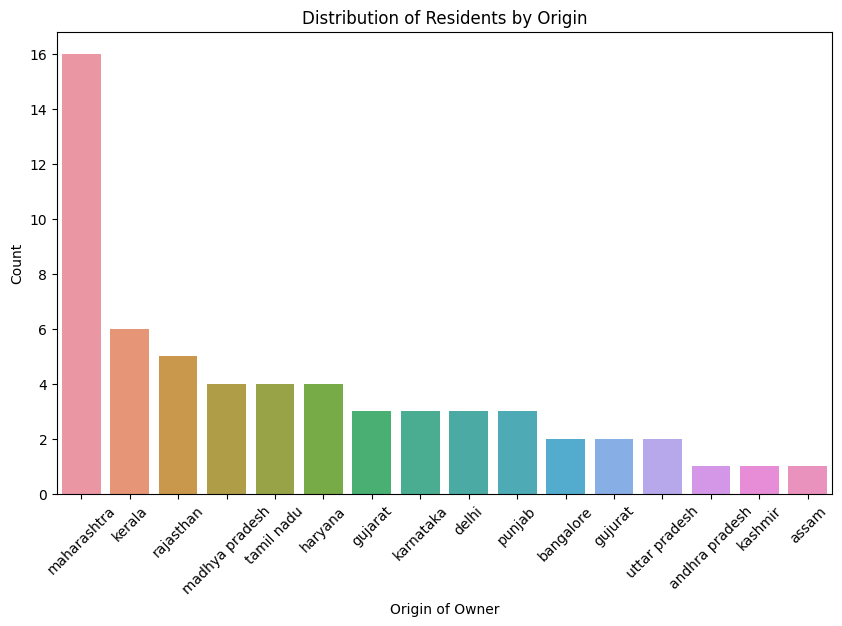

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Demographic Overview
# Calculate the average number of residents per flat
avg_residents_per_flat = df['No of Resident'].mean()
print(avg_residents_per_flat)

# Distribution of residents by origin
origin_distribution = df['Origin of Owner'].value_counts()

# Visualization: Distribution of residents by origin
plt.figure(figsize=(10, 6))
sns.barplot(x=origin_distribution.index, y=origin_distribution.values)
plt.title('Distribution of Residents by Origin')
plt.xlabel('Origin of Owner')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

554.1666666666666
2


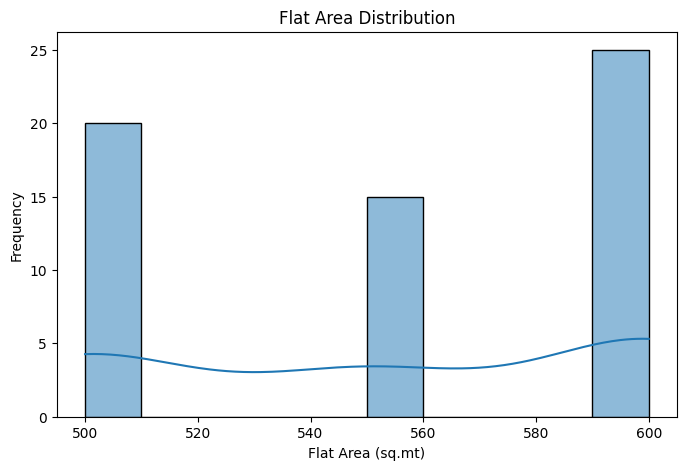

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Flat Information
#Calculate the average flat area (in square meters).
avg_flat_area = df['Flat Area (sq.mt)'].mean()
print(avg_flat_area)

#Find the most common number of rooms in flats.
most_common_room = df['No of Room'].mode().values[0]
print(most_common_room)

# Distribution of residents by origin
origin_distribution = df['Origin of Owner'].value_counts()

# Visualize the distribution of flat areas using a histogram.
plt.figure(figsize=(8, 5))
sns.histplot(df['Flat Area (sq.mt)'], bins=10, kde=True)
plt.title('Flat Area Distribution')
plt.xlabel('Flat Area (sq.mt)')
plt.ylabel('Frequency')
plt.show()

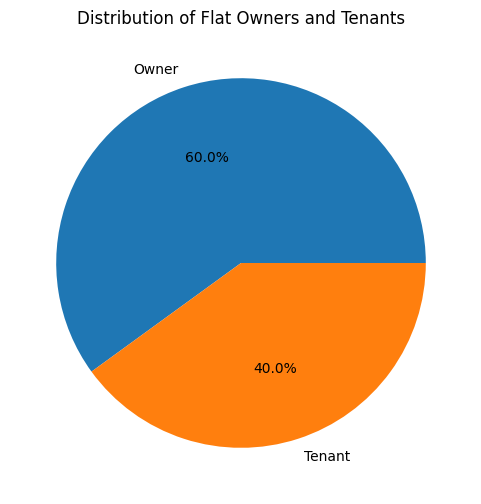

Average Number of Residents per Flat: 4.083333333333333

Average Flat Area: 554.1666666666666 sq.mt

Most Common Number of Rooms in Flats: 2

Percentage of Flat Owners: 60.0 %

Percentage of Tenants: 40.0 %


In [ ]:
# Owner and Tenant Information
# Calculate the percentage of flat owners and tenants
owner_percentage = (df['Tenant or owner'] == 'owner').mean() * 100
tenant_percentage = (df['Tenant or owner'] == 'tenant').mean() * 100

# Visualization: Distribution of Owner vs. Tenant
plt.figure(figsize=(6, 6))
plt.pie([owner_percentage, tenant_percentage], labels=['Owner', 'Tenant'], autopct='%1.1f%%')
plt.title('Distribution of Flat Owners and Tenants')
plt.show()


# Print the calculated statistics
print("Average Number of Residents per Flat:", avg_residents_per_flat)
print("\nAverage Flat Area:", avg_flat_area, "sq.mt")
print("\nMost Common Number of Rooms in Flats:", most_common_room)
print("\nPercentage of Flat Owners:", owner_percentage, "%")
print("\nPercentage of Tenants:", tenant_percentage, "%")

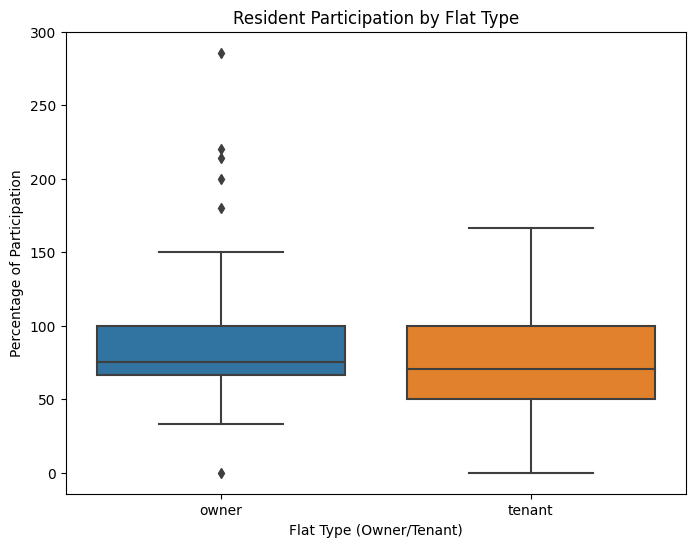

Percentage of Residents' Participation in the Event:
0     100.000000
1     120.000000
2      60.000000
3      50.000000
4     214.285714
5     100.000000
6     100.000000
7     100.000000
8      40.000000
9      60.000000
10     50.000000
11    285.714286
12    100.000000
13    100.000000
14     75.000000
15     66.666667
16     66.666667
17     50.000000
18     80.000000
19     66.666667
20     75.000000
21     75.000000
22     80.000000
23     75.000000
24     66.666667
25     75.000000
26     60.000000
27     50.000000
28     33.333333
29    100.000000
30    100.000000
31    220.000000
32     75.000000
33     66.666667
34     50.000000
35    100.000000
36     75.000000
37     80.000000
38     66.666667
39    100.000000
40    180.000000
41     80.000000
42     75.000000
43     66.666667
44     50.000000
45     75.000000
46     75.000000
47      0.000000
48      0.000000
49     66.666667
50    100.000000
51     80.000000
52    100.000000
53    166.666667
54    150.000000
55     33.33

In [ ]:
# Resident Participation

# Calculate the percentage of residents who confirmed participation
percentage_participation = (df['Confirmed Members'] / df['No of Resident']) * 100

# Visualization: Resident Participation by Flat Type
plt.figure(figsize=(8, 6))
sns.boxplot(x='Tenant or owner', y=percentage_participation, data=df)
plt.title('Resident Participation by Flat Type')
plt.xlabel('Flat Type (Owner/Tenant)')
plt.ylabel('Percentage of Participation')
plt.show()


# Donations Analysis

# Calculate the average donation amount
avg_donation_amount = df['Donation'].mean()

# Calculate the total donation amount collected
total_donation_amount = df['Donation'].sum()


# Event Planning Recommendations

# Recommendations for event planning based on data analysis
recommendations = []
if avg_donation_amount >= 5000:
    recommendations.append("Consider a higher budget for the event.")
else:
    recommendations.append("Budget allocation may be optimized based on donations.")
if percentage_participation.mean() >= 70:
    recommendations.append("Expect a good turnout for the event.")
else:
    recommendations.append("Engage in more outreach to boost participation.")
if total_donation_amount >= 50000:
    recommendations.append("Sufficient funds are available for event planning.")
else:
    recommendations.append("Consider additional fundraising efforts.")


# Print the calculated statistics and recommendations

print("Percentage of Residents' Participation in the Event:")
print(percentage_participation)
print("\nAverage Donation Amount:", avg_donation_amount)
print("Total Donation Amount Collected:", total_donation_amount)
print("\nEvent Planning Recommendations:")
for recommendation in recommendations:
    print("- " + recommendation)

In [ ]:
# Decorator Analysis
# Identify the decorator with the highest rating
highest_rated_decorator = df1[df1['Rating'] == df1['Rating'].max()]

# Identify the most cost-effective decorator based on decoration price
cost_effective_decorator = df1[df1['Decoration Price'] == df1['Decoration Price'].min()]

# Caterer Analysis
# Identify the caterer with the highest rating
highest_rated_caterer = df1[df1['Rating'] == df1['Rating'].max()]

# Identify the most cost-effective caterer based on plate cost
cost_effective_caterer = df1[df1['Plate Cost'] == df1['Plate Cost'].min()]

# Caterer and Decorator Recommendations
# Recommendations for selecting the best caterer and decorator
decorator_recommendation = f"The highest-rated decorator is '{highest_rated_decorator['Caterer Name'].values[0]}' with a rating of {highest_rated_decorator['Rating'].values[0]}."
caterer_recommendation = f"The most cost-effective caterer is '{cost_effective_caterer['Caterer Name'].values[0]}' with a plate cost of {cost_effective_caterer['Plate Cost'].values[0]}."

# Print the analysis results and recommendations
print("Decorator Analysis:")
print("Decorator with Highest Rating:")
print(highest_rated_decorator)
print("\nMost Cost-Effective Decorator:")
print(cost_effective_decorator)
print("\nCaterer Analysis:")
print("Caterer with Highest Rating:")
print(highest_rated_caterer)
print("\nMost Cost-Effective Caterer:")
print(cost_effective_caterer)
print("\nCaterer and Decorator Recommendations:")
print(decorator_recommendation)
print(caterer_recommendation)

Decorator Analysis:
Decorator with Highest Rating:
    Unnamed: 0  Plate Cost  Decoration Price  Rating Caterer Name
15          15         320              5400     4.8            p

Most Cost-Effective Decorator:
   Unnamed: 0  Plate Cost  Decoration Price  Rating Caterer Name
6           6         250              4200     3.4            g

Caterer Analysis:
Caterer with Highest Rating:
    Unnamed: 0  Plate Cost  Decoration Price  Rating Caterer Name
15          15         320              5400     4.8            p

Most Cost-Effective Caterer:
    Unnamed: 0  Plate Cost  Decoration Price  Rating Caterer Name
6            6         250              4200     3.4            g
12          12         250              5000     4.3            m

Caterer and Decorator Recommendations:
The highest-rated decorator is 'p' with a rating of 4.8.
The most cost-effective caterer is 'g' with a plate cost of 250.
